In [12]:
from patrolling_car.controller import sys_ctrl
import pickle
import hard_tests
import random
import visualization.animate as animate

import tulip as tlp
from tulip import transys, abstract, spec, synth
from IPython.display import HTML

import networkx as nx

import patrolling_car_tests

In [13]:
path = 'patrolling_car/'

In [14]:
with open(path + 'graph', "rb") as file:
    G = pickle.load(file)

In [15]:
# Load the system controller from the saved file
with open(path + "ctrl", "rb") as file:
    ctrl = pickle.load(file)

In [16]:
# Labeling the nodes like system nodes
for edge in ctrl.edges:
    for (key, val) in ctrl.edges[edge].items():
        ctrl.nodes[edge[1]][key] = val

In [17]:
# Conversions
r_conversion = ['c00', 'c01', 'c02', 'c03', 'c04', 'c10', 'c11', 'c12', 'c13', 'c14', 'c20', 'c21', 'c22', 'c23', 'c24', 'c30', 'c31', 'c32', 'c33', 'c34', 'c40', 'c41', 'c42', 'c43', 'c44'] # TODO: Double check this conversion
for node in G.nodes:
    G.nodes[node]['r'] = r_conversion[G.nodes[node]['r']]

In [18]:
# Removing nodes that violate the environment's safety

In [19]:
# Running the test that greedily picks the next state with the most unsafe 
# nodes
title = "Memoryless Most Red"
num_red_sys_metric = hard_tests.find_num_red_successors(G)
b_signal, trajectory = patrolling_car_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, num_red_sys_metric, 30)
# animate_test(ctrl, vh_signal, p_signal, light_signal, title)

In [20]:
time, states = ctrl.run('Sinit', {'b': b_signal})
car_path = states['r']
fuel_path = states['fuel']
b_conversion = ['c10', 'c11', 'c12', 'c13', 'c14']
b_path = [b_conversion[b] for b in b_signal]

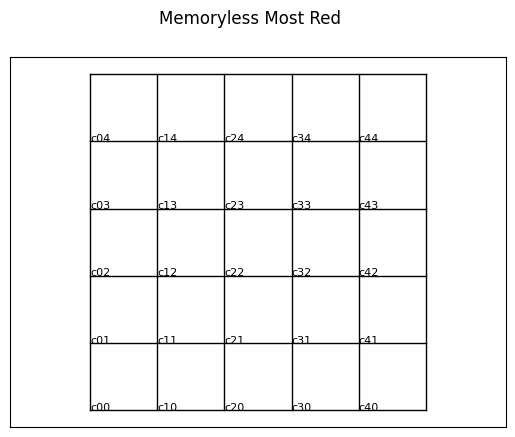

In [21]:
anim = animate.animate_pat_car(fuel_path, (car_path, b_path),title)

In [22]:
anim.save(path + title + '.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
states.keys()

In [ ]:
# I have b and I have r, fuel, and move

In [ ]:
# Running the test that greedily picks the next state with the most unsafe 
# nodes
title = "Memoryless Percent Red"
percent_red_sys_metric = hard_tests.find_percent_red_successors(G)
b_signal, trajectory = patrolling_car_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, percent_red_sys_metric, 30)

In [ ]:
title = "Memoryless Min Robustness - Minimizing"
min_robustness_env_metric = hard_tests.find_min_robustness(G)
b_signal, trajectory = patrolling_car_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_robustness_minimization, min_robustness_env_metric, 30)

In [ ]:
title = "Memoryless Average Robustness - Minimizing"
avg_robustness_env_metric = hard_tests.find_avg_robustness(G)
b_signal, trajectory = patrolling_car_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_robustness_minimization, avg_robustness_env_metric, 30)

In [ ]:
title = "Memoryless Min Robustness - Averaging"
min_robustness_env_metric = hard_tests.find_min_robustness(G)
b_signal, trajectory = patrolling_car_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_robustness_averaging, min_robustness_env_metric, 30)

In [ ]:
title = "Memoryless Average Robustness - Averaging"
avg_robustness_env_metric = hard_tests.find_avg_robustness(G)
b_signal, trajectory = patrolling_car_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_robustness_averaging, avg_robustness_env_metric, 30)

# Creating the Potential Hard Tests

## Memoryless Most Red

In [ ]:
num_red_sys_metric = hard_tests.find_num_red_successors(G)

In [ ]:
memoryless_most_red = hard_tests.memoryless_max_metric(G, num_red_sys_metric)

# Memoryless Percent Red

In [ ]:
percent_red_sys_metric = hard_tests.find_percent_red_successors(G)

In [ ]:
memoryless_percent_red = hard_tests.memoryless_max_metric(G, percent_red_sys_metric)

## Memoryless Min Robustness - Minimizing 

In [ ]:
min_robustness_env_metric = hard_tests.find_min_robustness(G)

In [ ]:
memoryless_min_rob_minimizing = hard_tests.memoryless_robustness_minimization(G, min_robustness_env_metric)

## Memoryless Average Robustness - Minimizing

In [ ]:
avg_robustness_env_metric = hard_tests.find_avg_robustness(G)

In [ ]:
memoryless_avg_rob_minimizing = hard_tests.memoryless_robustness_minimization(G, avg_robustness_env_metric)

## Memoryless Min Robustness - Averaging

In [ ]:
min_robustness_env_metric = hard_tests.find_min_robustness(G)

In [ ]:
memoryless_min_rob_averaging = hard_tests.memoryless_robustness_averaging(G, min_robustness_env_metric)

## Memoryless Average Robustness - Averaging

In [ ]:
avg_robustness_env_metric = hard_tests.find_avg_robustness(G)

In [ ]:
memoryless_avg_rob_averaging = hard_tests.memoryless_robustness_averaging(G, avg_robustness_env_metric)

# Comparing Tests

In [ ]:
memoryless_most_red == memoryless_percent_red

In [ ]:
memoryless_avg_rob_minimizing == memoryless_min_rob_minimizing

In [ ]:
memoryless_avg_rob_averaging == memoryless_min_rob_averaging

In [ ]:
memoryless_min_rob_minimizing == memoryless_min_rob_averaging

In [ ]:
memoryless_avg_rob_minimizing == memoryless_avg_rob_averaging

# Number of Transitions

In [ ]:
for key, val in memoryless_most_red.items():
    assert(len(val) == 1)

In [ ]:
for key, val in memoryless_percent_red.items():
    assert(len(val) == 1)

In [ ]:
for key, val in memoryless_min_rob_minimizing.items():
    assert(len(val) == 1)

In [ ]:
for key, val in memoryless_avg_rob_minimizing.items():
    assert(len(val) == 1)

In [ ]:
for key, val in memoryless_min_rob_averaging.items():
    assert(len(val) == 1)

In [ ]:
for key, val in memoryless_avg_rob_averaging.items():
    assert(len(val) == 1)